In [10]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


import bokeh
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)


In [11]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/pollution_us_2000_2016.csv"
df = pd.read_csv(csv_path)

In [12]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
df['year'] = pd.DatetimeIndex(df['Date Local']).year
df['Date Local'] = pd.to_datetime(df['Date Local'],format='%Y-%m-%d') 

In [13]:
# Delete extraneous column
df = df.drop(['Unnamed: 0','State Code','County Code','Address','Site Num','NO2 Units','O3 Units','SO2 Units','CO Units'], axis=1)
# Removing Mexico
df = df[df.State!='Country Of Mexico']
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [14]:
df.State.unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [15]:
df_grouped = df.groupby(['State','Date Local']).mean()
df_grouped.head()

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI  \
State   Date Local                                                            
Alabama 2013-12-01  17.208333               39.3              18.0     37.0   
        2013-12-02  20.687500               32.4               7.0     30.0   
        2013-12-03  14.912500               22.4              17.0     21.0   
        2013-12-04   7.825000               19.3              17.0     18.0   
        2013-12-05   8.004762               16.0               7.0     15.0   

                     O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.013542             0.026              9.0    24.0   
        2013-12-02  0.009375             0.013              0.0    12.0   
        2013-12-03  0.008167             0.012             22.0    11.0   
        2013-12-04  0.011125             0.014              8.0    13.0   
        2013-12-05  0.010083             0.014             18.0    13.0   

                    SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  SO2 AQI  \
State   Date Local                                                           
Alabama 2013-12-01  0.285390               0.75              11.0      1.0   
        2013-12-02  0.531666               2.10              11.0      3.0   
        2013-12-03  0.252632               1.35              12.5      3.0   
        2013-12-04  0.123052               0.95              17.0      1.0   
        2013-12-05 -0.014285               0.60               2.5      1.0   

                     CO Mean  CO 1st Max Value  CO 1st Max Hour  CO AQI  \
State   Date Local                                                        
Alabama 2013-12-01  0.262879             0.650              8.5     6.0   
        2013-12-02  0.352812             0.485              8.0     6.0   
        2013-12-03  0.237575             0.325              4.0     3.0   
        2013-12-04  0.115152             0.220             18.5     2.0   
        2013-12-05  0.117575             0.200             17.5     2.0   

                      year  
State   Date Local          
Alabama 2013-12-01  2013.0  
        2013-12-02  2013.0  
        2013-12-03  2013.0  
        2013-12-04  2013.0  
        2013-12-05  2013.0

In [ ]:
# Dropping the NA values at this point would end up losing a lot of data for O3 and CO2 data, so we want to maintain separate dfs once we get to that point. 

In [16]:
#NO2 data
NO2_data = df[["State", "County", "City","NO2 Mean","NO2 1st Max Value", "NO2 1st Max Hour", "NO2 AQI","Date Local","year"
                          ]]
NO2_data.head()

,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,19.041667,49.0,19,46,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,22.958333,36.0,19,34,2000-01-02,2000


In [19]:
df_c = NO2_data.sort_values('State')
df_c

,State,County,City,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,Date Local,year
1597016,Alabama,Jefferson,Birmingham,15.704167,26.0,18,25,2015-11-15,2015
1596297,Alabama,Jefferson,Birmingham,5.354167,9.6,21,8,2015-05-16,2015
1596298,Alabama,Jefferson,Birmingham,5.354167,9.6,21,8,2015-05-16,2015
1596299,Alabama,Jefferson,Birmingham,5.354167,9.6,21,8,2015-05-16,2015
1596300,Alabama,Jefferson,Birmingham,5.354167,9.6,21,8,2015-05-16,2015
1596301,Alabama,Jefferson,Birmingham,4.729167,14.4,19,13,2015-05-17,2015
1596302,Alabama,Jefferson,Birmingham,4.729167,14.4,19,13,2015-05-17,2015
1596303,Alabama,Jefferson,Birmingham,4.729167,14.4,19,13,2015-05-17,2015
1596304,Alabama,Jefferson,Birmingham,4.729167,14.4,19,13,2015-05-17,2015
1596305,Alabama,Jefferson,Birmingham,7.410000,17.2,21,16,2015-05-18,2015


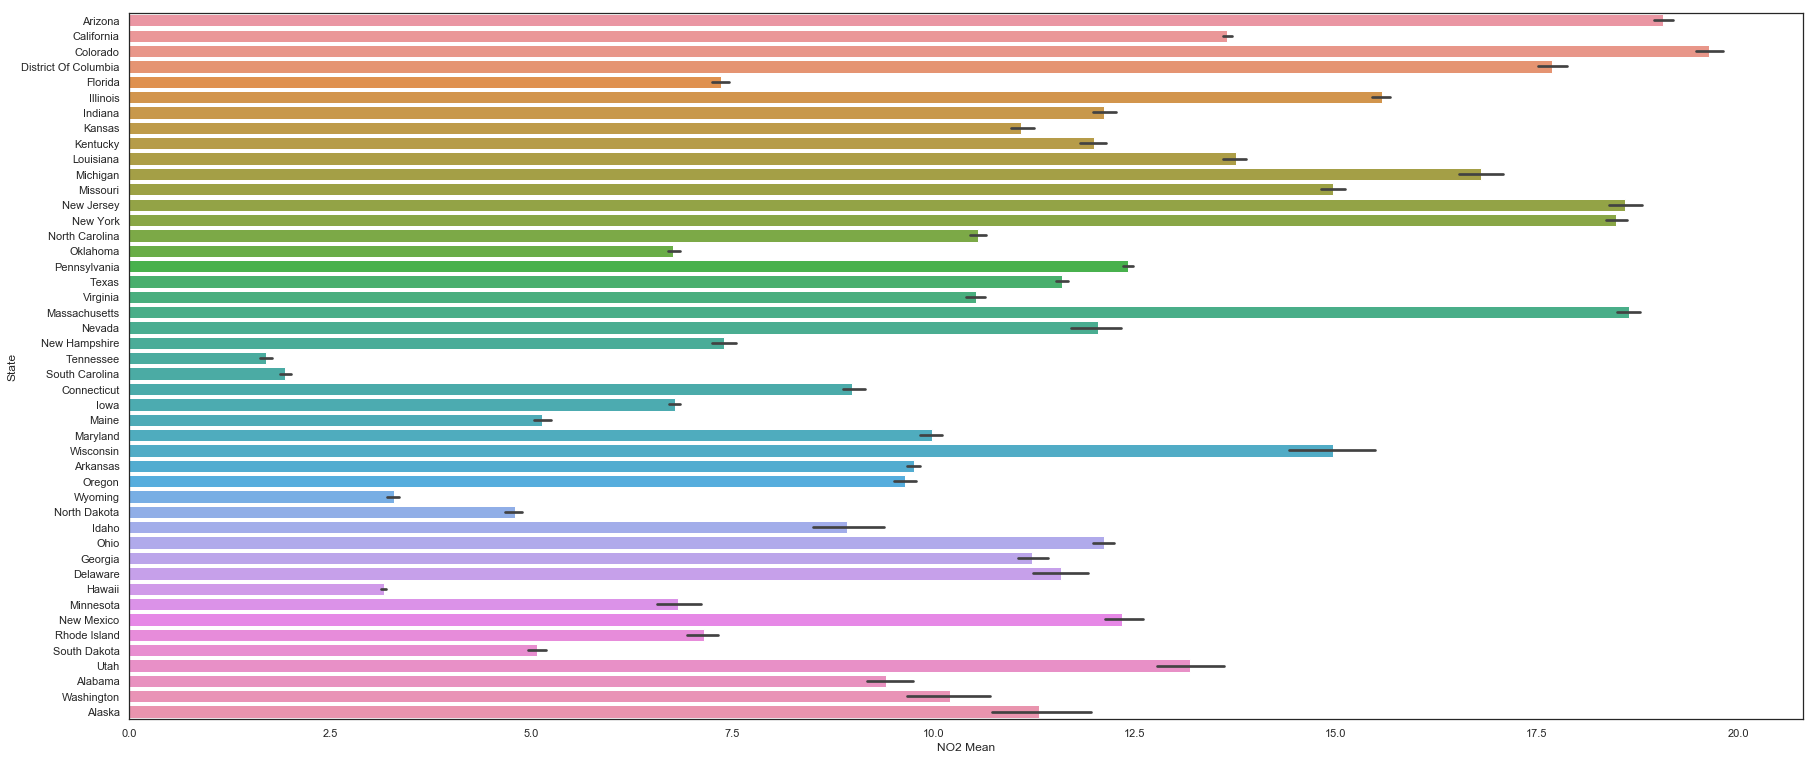

In [17]:
#Now we are ready to create some data visualizations
#This seaborn barplot shows the mean NO2 levels for each state
ax = sns.barplot(x="NO2 Mean",y="State", data=NO2_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(30, 13)

In [ ]:
#NO2 data group it 
NO2_group = df[["State","County","City","NO2 AQI","Date Local","year"
                          ]]
NO2_group.head()

In [ ]:
# Grouping the DataFrame by "Assignee"
citycounty_group = NO2_group.groupby(["State","County","City"])

citycounty_group


In [ ]:
# Count how many of each component Assignees worked on and create DataFrame of the data
citycounty_grpdisplay = pd.DataFrame(citycounty_group["City"].value_counts())
citycounty_grpdisplay

In [21]:
#O3 data

O3_data = df[["State", "County", "City","O3 Mean","O3 1st Max Value", "O3 1st Max Hour", "O3 AQI"
                          ]]
O3_data.head()

,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI
0,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
1,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
2,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
3,Arizona,Maricopa,Phoenix,0.022500,0.040,10,34
4,Arizona,Maricopa,Phoenix,0.013375,0.032,10,27


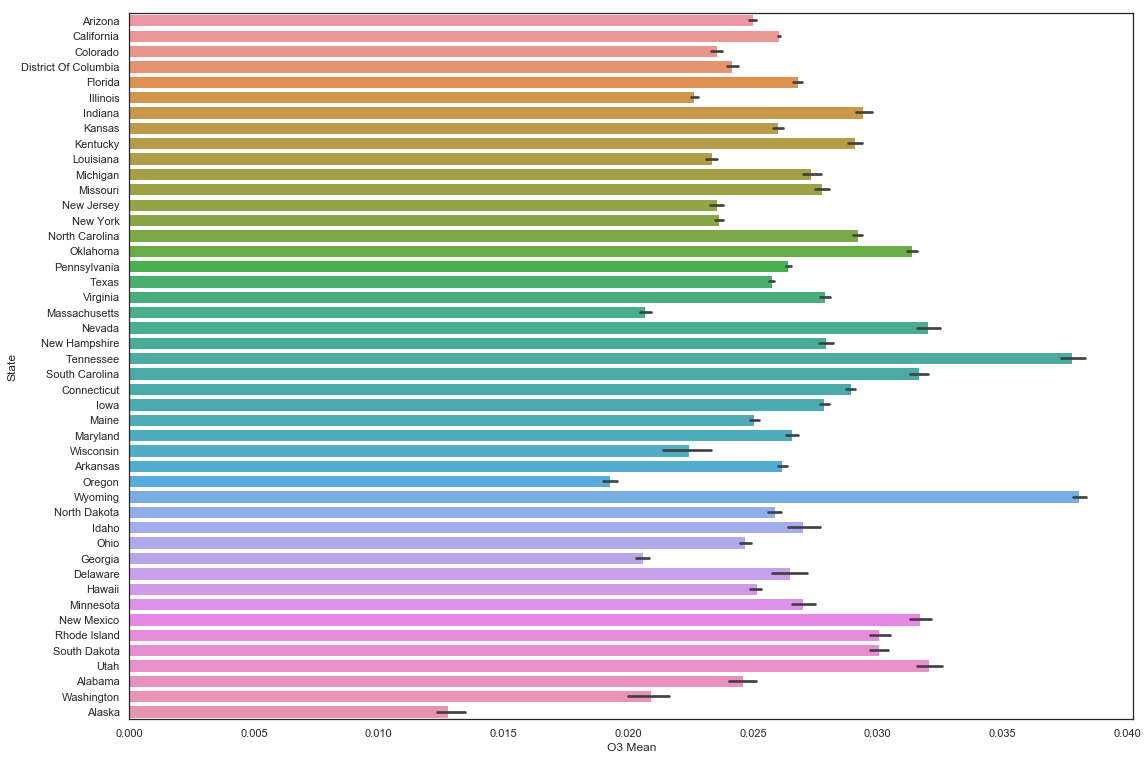

In [22]:
#Repeat this step for the O3 Mean
ax = sns.barplot(x="O3 Mean",y="State", data=O3_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)
plt.show()

In [8]:
# the following two groupbys need a dropped dataframe
df_drop = df.dropna(how='any')
df_drop.count()

State                436876
County               436876
City                 436876
Date Local           436876
NO2 Mean             436876
NO2 1st Max Value    436876
NO2 1st Max Hour     436876
NO2 AQI              436876
O3 Mean              436876
O3 1st Max Value     436876
O3 1st Max Hour      436876
O3 AQI               436876
SO2 Mean             436876
SO2 1st Max Value    436876
SO2 1st Max Hour     436876
SO2 AQI              436876
CO Mean              436876
CO 1st Max Value     436876
CO 1st Max Hour      436876
CO AQI               436876
year                 436876
dtype: int64

In [24]:
#SO2 data
SO2_data = df[["State","County", "City","SO2 Mean","SO2 1st Max Value", "SO2 1st Max Hour", "SO2 AQI","Date Local","year"
                   ]]
SO2_data.head()

,State,County,City,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,3.000000,9.0,21,13.0,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,3.000000,9.0,21,13.0,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,2.975000,6.6,23,NaN,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,2.975000,6.6,23,NaN,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,1.958333,3.0,22,4.0,2000-01-02,2000


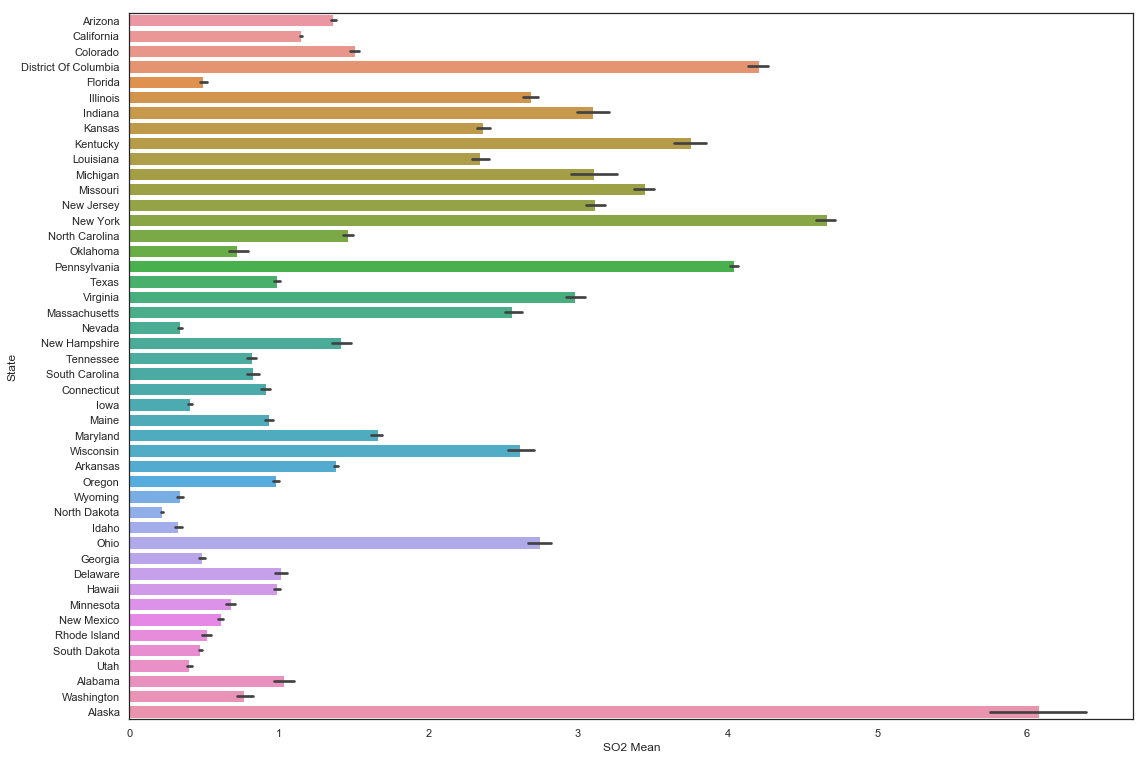

In [28]:
#Now we will plot the SO2 Mean with the same graph to show differences in pollutant levels
ax = sns.barplot(x="SO2 Mean",y="State", data=SO2_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)

In [27]:
#CO data
CO_data = df[["State", "County", "City","CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI", "Date Local","year"
                  ]]
CO_data.head()


,State,County,City,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Date Local,year
0,Arizona,Maricopa,Phoenix,1.145833,4.2,21,NaN,2000-01-01,2000
1,Arizona,Maricopa,Phoenix,0.878947,2.2,23,25.0,2000-01-01,2000
2,Arizona,Maricopa,Phoenix,1.145833,4.2,21,NaN,2000-01-01,2000
3,Arizona,Maricopa,Phoenix,0.878947,2.2,23,25.0,2000-01-01,2000
4,Arizona,Maricopa,Phoenix,0.850000,1.6,23,NaN,2000-01-02,2000


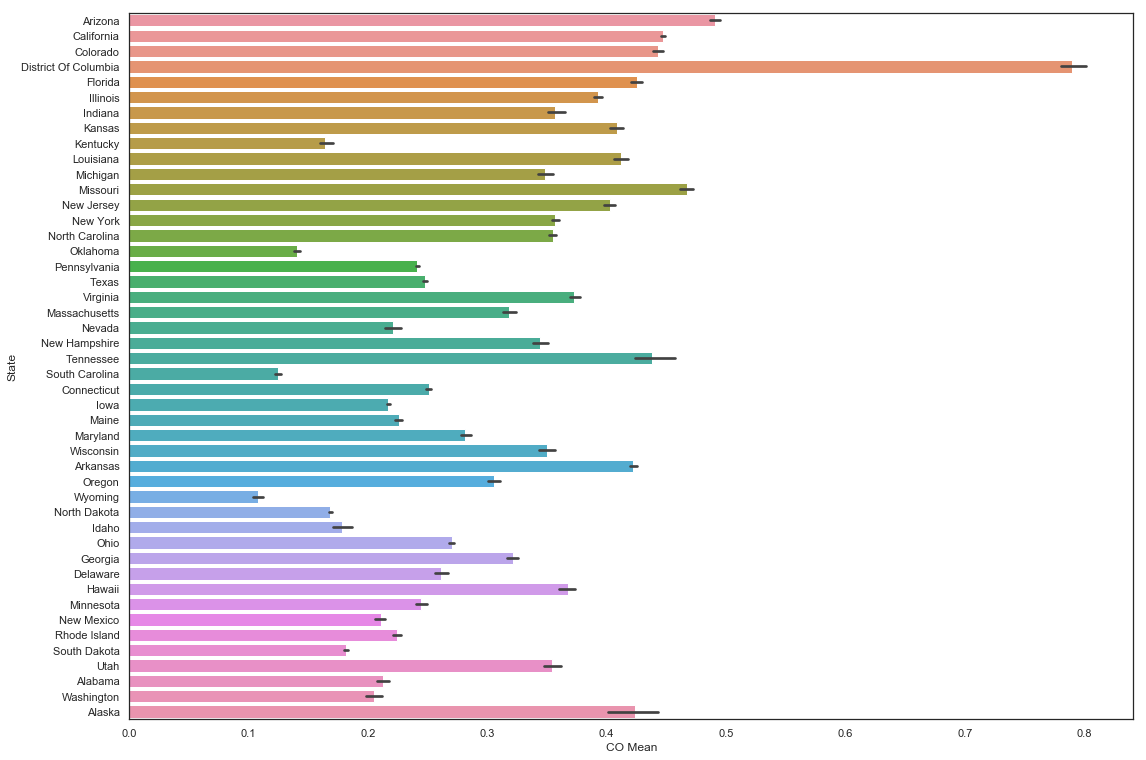

In [29]:
#Now we will plot the CO Mean with the same graph to show differences in pollutant levels
ax = sns.barplot(x="CO Mean",y="State", data=CO_data, ci=100)
fig = plt.gcf()
fig.set_size_inches(18, 13)

In [42]:
dff_group = df.groupby(["State"]).mean()

dff_group

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
State,,,,,,,,,,,,,,,,,
Alabama,9.410693,22.969098,13.158029,21.232246,0.024612,0.038434,9.293026,36.845170,1.034236,4.230198,10.756238,7.005115,0.212607,0.407386,9.446257,3.850288,2014.725528
Alaska,11.313152,21.046910,12.218845,19.553191,0.012799,0.019116,10.341439,17.725431,6.083755,9.659372,9.983789,14.487335,0.423438,0.677599,10.138804,6.528340,2014.637285
Arizona,19.067975,38.398603,14.230985,36.106987,0.024989,0.043125,10.122022,39.004095,1.364213,2.728664,10.247938,4.213486,0.490616,0.982476,9.511755,9.191023,2007.698024
Arkansas,9.753701,23.094102,12.160195,21.486471,0.026169,0.038766,10.046983,35.035662,1.383302,2.272116,10.036115,2.975773,0.422393,0.558514,7.939375,5.929914,2011.673610
California,13.651894,25.592142,11.264417,24.110238,0.026053,0.038820,10.204474,35.722673,1.146695,2.331772,8.508692,3.598278,0.447485,0.769284,7.430949,7.405669,2007.483221
Colorado,19.634275,38.079445,10.618961,35.958878,0.023551,0.038193,10.033335,34.673582,1.507634,5.977720,9.037683,10.605523,0.443112,0.814280,8.691912,7.724205,2009.411504
Connecticut,8.990965,19.579982,10.423412,18.457355,0.028920,0.040321,10.459226,37.149400,0.912121,2.327872,10.747269,3.221925,0.250866,0.366647,8.229045,3.586407,2011.298400
Delaware,11.584773,23.194050,11.089256,21.541047,0.026494,0.038084,10.110193,35.400000,1.014242,2.189091,10.987052,2.819835,0.261600,0.401025,8.929477,3.839384,2012.819284
District Of Columbia,17.689366,32.478845,11.974393,30.602895,0.024184,0.036639,10.426759,33.781289,4.209670,8.157947,10.705090,12.887956,0.790170,1.125385,9.308608,11.605105,2008.048490


In [ ]:
users = [13000, 26000, 52000, 30000, 9000]
states = [State]
x_axis = np.arange(len(users))

In [45]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [ ]:
State	Date Local	NO2 Mean	NO2 AQI	O3 Mean	O3 1st Max Hour	O3 AQI	SO2 Mean	SO2 AQI	CO Mean	CO AQI

In [49]:
#drop unwanted columns
data = df.drop(['County','City',
                'NO2 1st Max Value','NO2 1st Max Hour',
                'O3 1st Max Value',
                'SO2 1st Max Value','SO2 1st Max Hour',
                'CO 1st Max Value','CO 1st Max Hour','year'], axis=1)
data.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,1.145833,NaN
1,Arizona,2000-01-01,19.041667,46,0.022500,10,34,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46,0.022500,10,34,2.975000,NaN,1.145833,NaN
3,Arizona,2000-01-01,19.041667,46,0.022500,10,34,2.975000,NaN,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34,0.013375,10,27,1.958333,4.0,0.850000,NaN


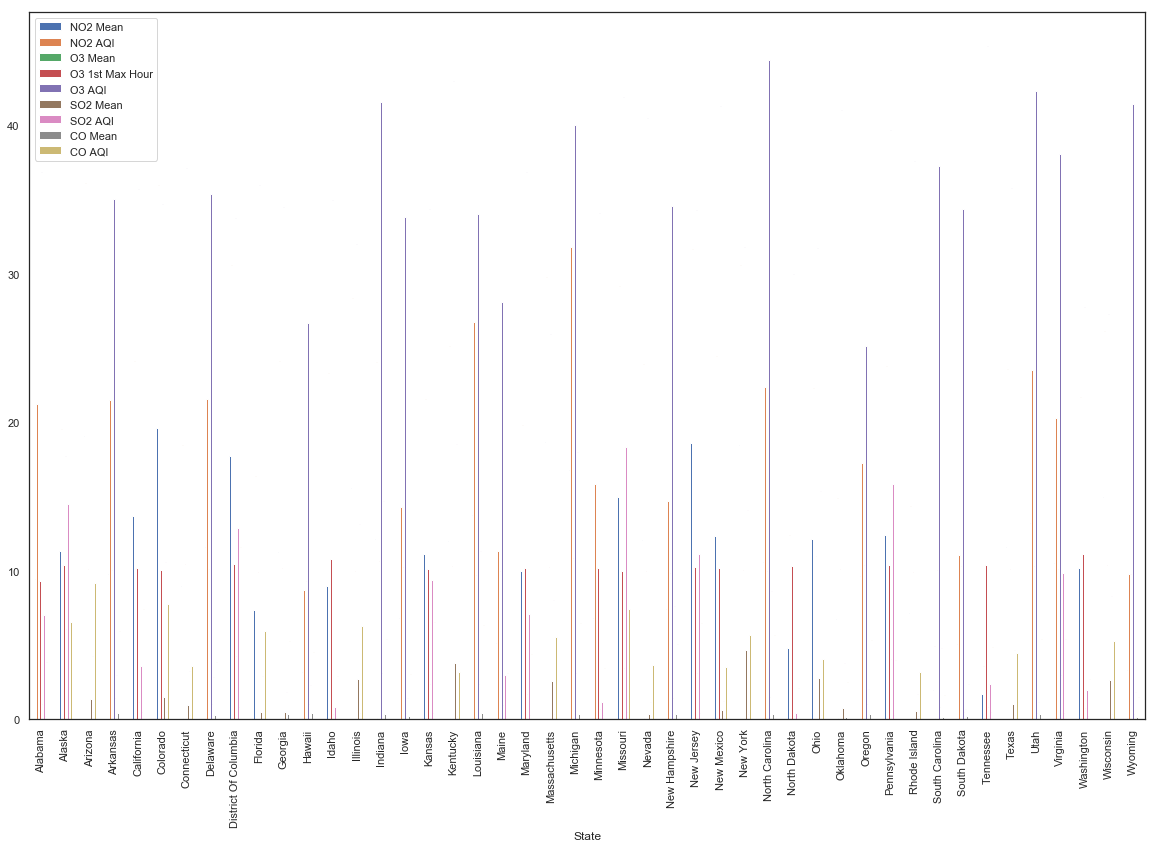

In [50]:
#This shows the total mean data grouped by state
data.groupby('State').mean().plot(kind = 'bar', figsize = (20, 13))

/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


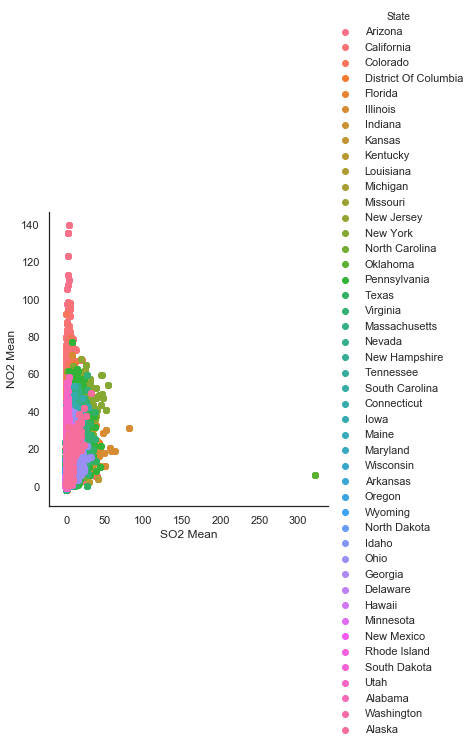

In [32]:
#To create a seaborn plot using NO2 Mean and SO2 Mean Data
sns.FacetGrid(df, hue="State", size=5) \
   .map(plt.scatter, "SO2 Mean", "NO2 Mean") \
   .add_legend()
plt.show()

In [52]:
#create a scatterplot in bokeh
#image can be seen as an at the link below
from bokeh.charts import Histogram, output_file, show

p = Scatter(data, x='State', y='SO2 AQI', color='blue', title="SO2 AQI by State",
            xlabel="State", ylabel="SO2 AQI",height=1000, width=1000)

output_file("pollution.html")

show(p)

ModuleNotFoundError: No module named 'bokeh.charts'

In [35]:
len(df.State.unique())

46

In [58]:
## Prepare all 4 AQIs against state and date 

df_State = df[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]

df_State.head()



,State,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Arizona,2000-01-01,46,34,13.0,NaN
1,Arizona,2000-01-01,46,34,13.0,25.0
2,Arizona,2000-01-01,46,34,NaN,NaN
3,Arizona,2000-01-01,46,34,NaN,25.0
4,Arizona,2000-01-02,34,27,4.0,NaN


In [60]:
pollSt = df_State.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollSt.head()

NO2 AQI  O3 AQI  SO2 AQI  CO AQI
State   Date Local                                  
Alabama 2013-12-01     37.0    24.0      1.0     6.0
        2013-12-02     30.0    12.0      3.0     6.0
        2013-12-03     21.0    11.0      3.0     3.0
        2013-12-04     18.0    13.0      1.0     2.0
        2013-12-05     15.0    13.0      1.0     2.0

In [61]:
pollStGrouped = pollSt.groupby(level=0)
pollStGrouped

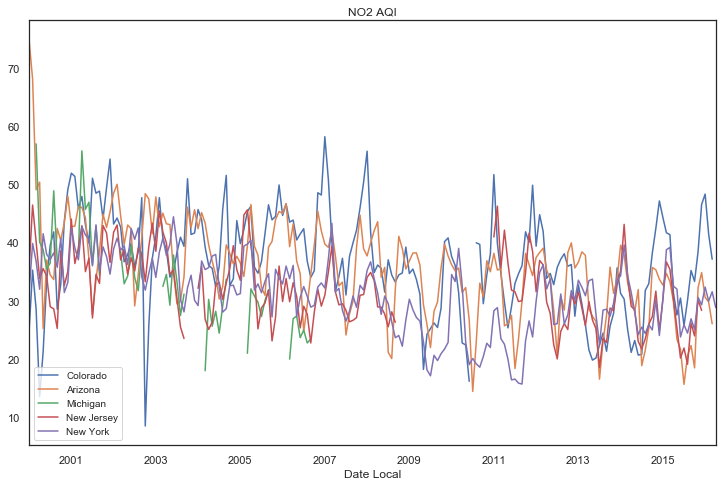

In [169]:
plt.figure(figsize=(20,13))

# NO2 AQI
plt.subplot(221)
pollNO2 = pollStGrouped['NO2 AQI']
pollNO2Top = pollNO2.mean().nlargest(5).index
for i in range(len(pollNO2Top)):
    pollNO2.get_group(pollNO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollNO2Top,loc=3,fontsize='small')
plt.title('NO2 AQI')

plt.tight_layout()
plt.show()

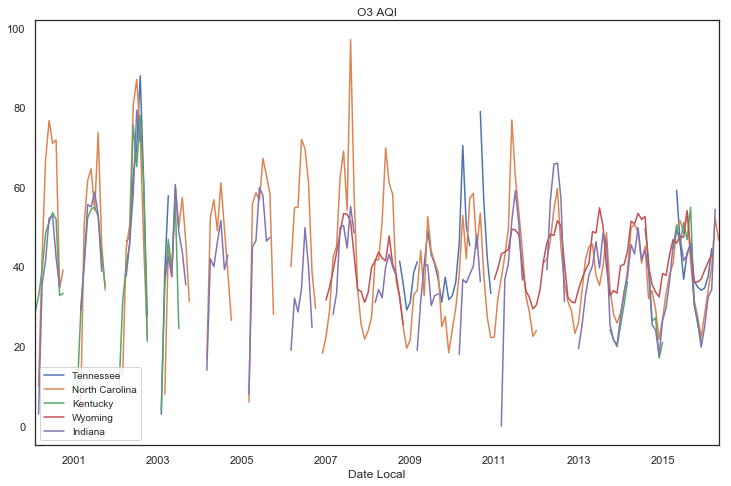

In [170]:
plt.figure(figsize=(20,13))

# O3 AQI
plt.subplot(222)
pollO3 = pollStGrouped['O3 AQI']
pollO3Top = pollO3.mean().nlargest(5).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.title('O3 AQI')

plt.tight_layout()
plt.show()

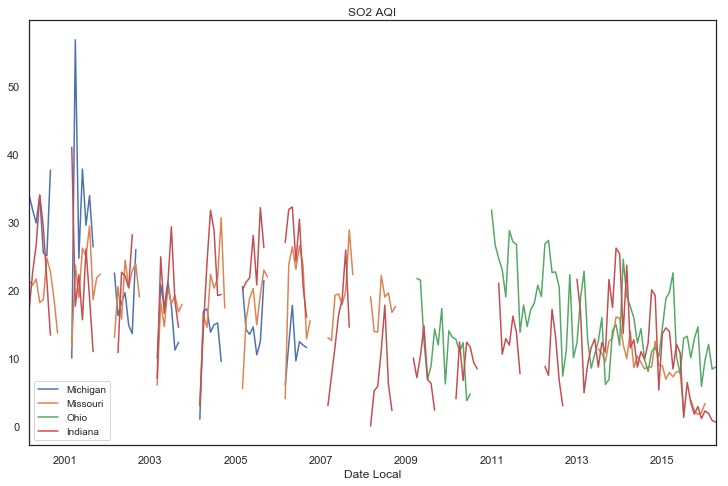

In [69]:
plt.figure(figsize=(20,13))

# SO2 AQI
plt.subplot(223)
pollSO2 = pollStGrouped['SO2 AQI']
pollSO2Top = pollSO2.mean().nlargest(4).index
for i in range(len(pollSO2Top)):
    pollSO2.get_group(pollSO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollSO2Top,loc=3,fontsize='small')
plt.title('SO2 AQI')

plt.tight_layout()
plt.show()


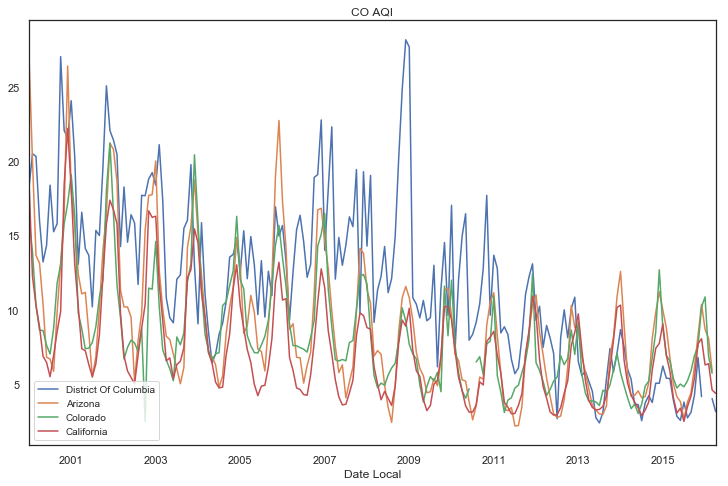

In [68]:
plt.figure(figsize=(20,13))

# CO AQI
plt.subplot(224)
pollCO = pollStGrouped['CO AQI']
pollCOTop = pollCO.mean().nlargest(4).index
for i in range(len(pollCOTop)):
    pollCO.get_group(pollCOTop[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollCOTop,loc=3,fontsize='small')
plt.title('CO AQI')

plt.tight_layout()
plt.show()

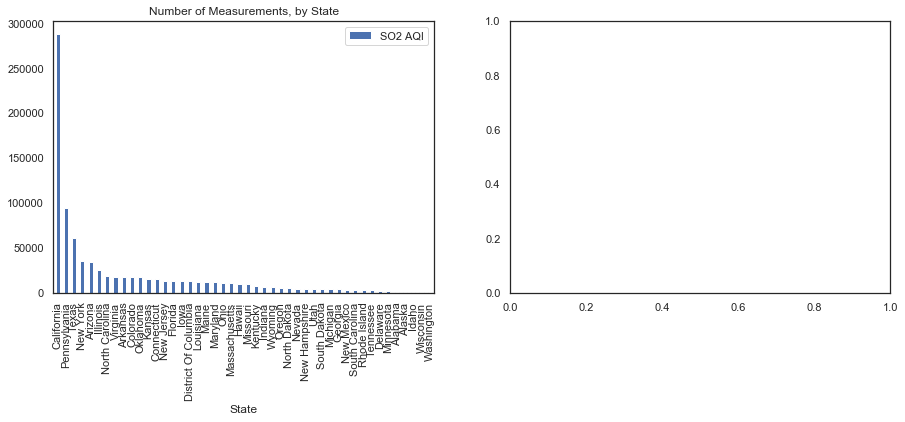

In [84]:
f , ax = plt.subplots(1,2, figsize=[15,5])
#f, ax = plt.subplots(figsize=[20,6])
df[['SO2 AQI','State']].groupby(["State"]).count()\
.sort_values(by='SO2 AQI',ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("Number of Measurements, by State")

plt.show()

/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all alia

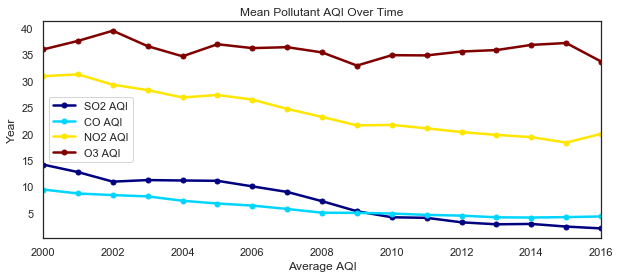

In [76]:
# Plot the aggregate decrease of all pollutants
f, ax = plt.subplots(figsize=[10,4])
df.groupby(['year']).agg({'SO2 AQI': 'mean',
                          'CO AQI': 'mean',
                          'NO2 AQI': 'mean',
                          'O3 AQI': 'mean'})\
.plot(lw=2,colormap='jet',marker='.',markersize=10, ax =ax,linewidth=2.5)
ax.set_title('Mean Pollutant AQI Over Time')
ax.set(xlabel="Average AQI", ylabel="Year")
plt.show()

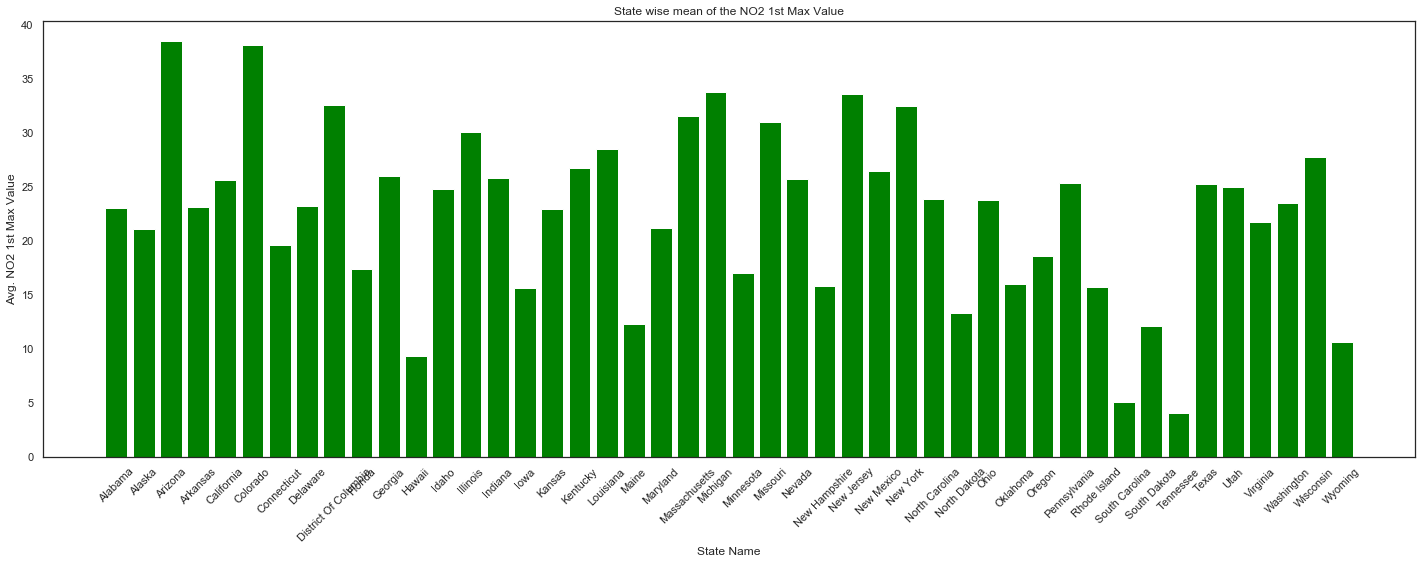

In [100]:
#NO2

states_no2_1st_val = df.groupby(["State"], as_index=False)["NO2 1st Max Value"].mean()

plt.figure(figsize=(20,8))
plt.bar( states_no2_1st_val['State'], states_no2_1st_val['NO2 1st Max Value'], color='green')

plt.xlabel("State Name")
plt.ylabel("Avg. NO2 1st Max Value")
plt.title("By State - mean of the NO2 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)
plt.tight_layout()

plt.show()


In [85]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


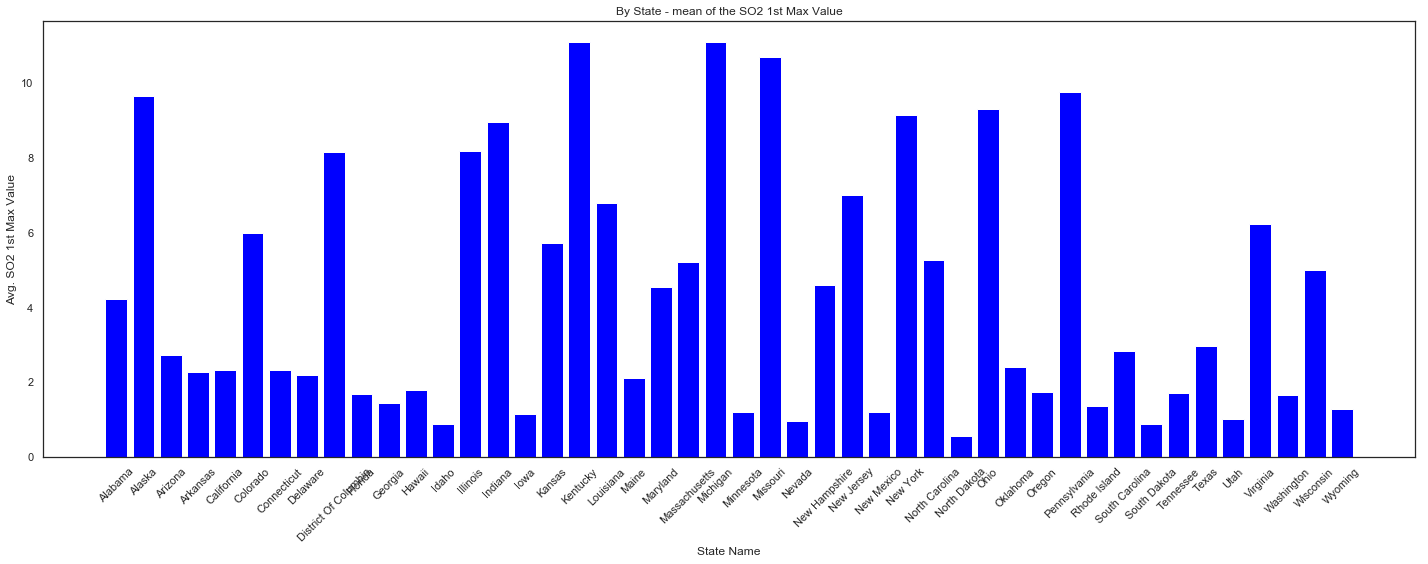

In [102]:
#SO2

states_so2_1st_val = df.groupby(["State"], as_index=False)["SO2 1st Max Value"].mean()

plt.figure(figsize=(20,8))
plt.bar( states_so2_1st_val['State'], states_so2_1st_val['SO2 1st Max Value'], color='blue')

plt.xlabel("State Name")
plt.ylabel("Avg. SO2 1st Max Value")
plt.title("By State - mean of the SO2 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)
plt.tight_layout()

plt.show()





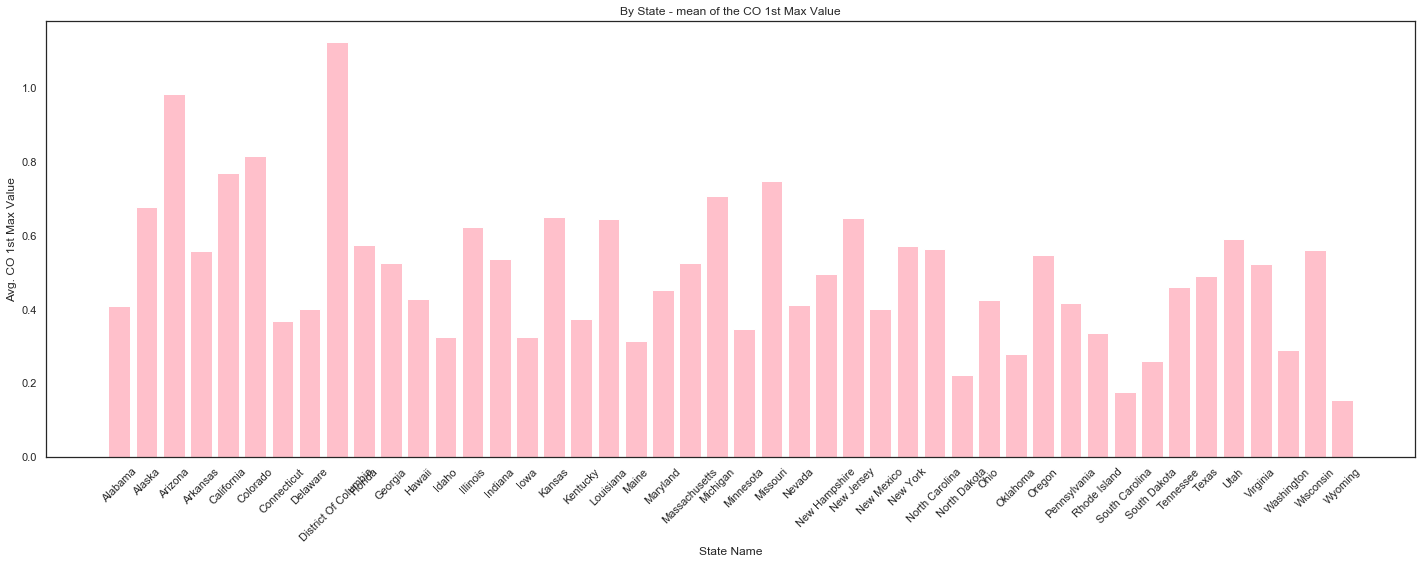

In [107]:
#CO

states_co_1st_val = df.groupby(["State"], as_index=False)["CO 1st Max Value"].mean()

plt.figure(figsize=(20,8))
plt.bar( states_co_1st_val['State'], states_co_1st_val['CO 1st Max Value'], color='pink')

plt.xlabel("State Name")
plt.ylabel("Avg. CO 1st Max Value")
plt.title("By State - mean of the CO 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)
plt.tight_layout()

plt.show()


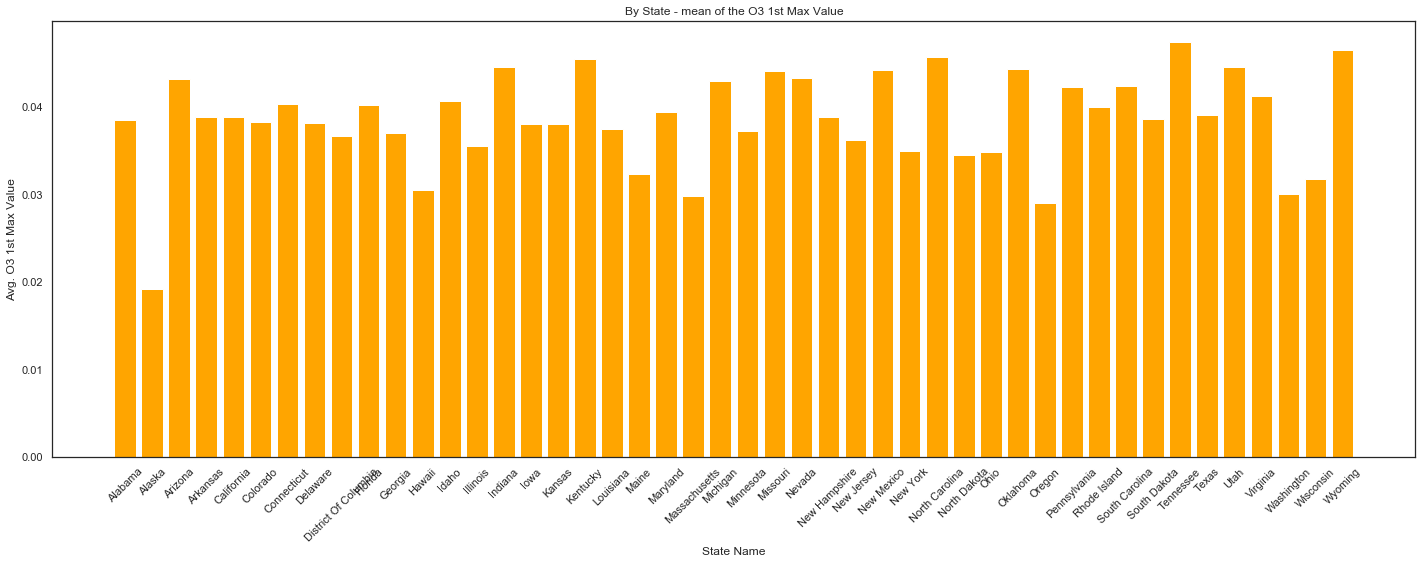

In [111]:
#O3

states_o3_1st_val = df.groupby(["State"], as_index=False)["O3 1st Max Value"].mean()

plt.figure(figsize=(20,8))
plt.bar( states_o3_1st_val['State'], states_o3_1st_val['O3 1st Max Value'], color='orange')

plt.xlabel("State Name")
plt.ylabel("Avg. O3 1st Max Value")
plt.title("By State - mean of the O3 1st Max Value")

plt.xticks(rotation=45)
#plt.set_cmap(states_no2_1st_val["State"], rotation=45)
plt.tight_layout()

plt.show()




In [152]:
x =df['State']
x.unique()

array(['Arizona', 'California', 'Colorado', 'District Of Columbia',
       'Florida', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
       'Louisiana', 'Michigan', 'Missouri', 'New Jersey', 'New York',
       'North Carolina', 'Oklahoma', 'Pennsylvania', 'Texas', 'Virginia',
       'Massachusetts', 'Nevada', 'New Hampshire', 'Tennessee',
       'South Carolina', 'Connecticut', 'Iowa', 'Maine', 'Maryland',
       'Wisconsin', 'Arkansas', 'Oregon', 'Wyoming', 'North Dakota',
       'Idaho', 'Ohio', 'Georgia', 'Delaware', 'Hawaii', 'Minnesota',
       'New Mexico', 'Rhode Island', 'South Dakota', 'Utah', 'Alabama',
       'Washington', 'Alaska'], dtype=object)

In [153]:
y1 =df['NO2 1st Max Value']
y1.unique()

array([ 4.900e+01,  3.600e+01,  5.100e+01,  7.400e+01,  6.100e+01,
        7.300e+01,  4.300e+01,  4.100e+01,  3.700e+01,  7.000e+01,
        8.100e+01,  1.170e+02,  1.240e+02,  8.700e+01,  1.010e+02,
        6.500e+01,  6.400e+01,  6.600e+01,  7.700e+01,  5.900e+01,
        4.200e+01,  5.400e+01,  5.700e+01,  5.300e+01,  5.500e+01,
        7.100e+01,  9.200e+01,  6.700e+01,  8.900e+01,  4.800e+01,
        6.900e+01,  6.300e+01,  3.900e+01,  6.800e+01,  4.700e+01,
        3.300e+01,  6.000e+01,  5.800e+01,  5.000e+01,  4.500e+01,
        7.500e+01,  5.200e+01,  7.800e+01,  1.600e+01,  1.200e+01,
        5.600e+01,  7.600e+01,  8.100e+00,  7.500e+00,  7.100e+00,
        5.700e+00,  4.600e+00,  4.300e+00,  3.700e+00,  4.700e+00,
        5.600e+00,  3.400e+00,  3.200e+00,  8.300e+00,  8.200e+00,
        7.900e+00,  5.400e+00,  1.900e+00,  5.900e+00,  1.180e+01,
        6.600e+00,  3.800e+00,  5.200e+00,  1.480e+01,  1.360e+01,
        1.010e+01,  1.060e+02,  1.160e+02,  8.000e+01,  8.400e

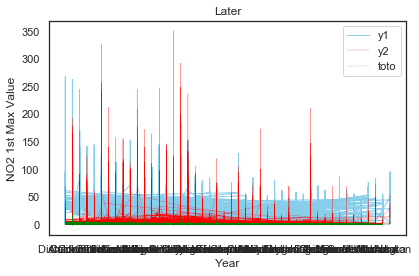

In [158]:
#x =df['State']
#y1 =df['NO2 1st Max Value']
#y2 =df['SO2 1st Max Value']
#y3 =df['CO 1st Max Value']
#y =df['NO2 1st Max Value']

# Data
dfx=pd.DataFrame({'x': df['State'], 'y1': df['NO2 1st Max Value'], 'y2': df['SO2 1st Max Value'], 'y3': df['CO 1st Max Value'] })

#z =df['year']


# multiple line plot
#plt.plot( 'x', 'y1', data=dfx, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
#plt.plot( 'x', 'y2', data=dfx, marker='', color='olive', linewidth=2)
#plt.plot( 'x', 'y3', data=dfx, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

plt.plot( 'x', 'y1', data=dfx, marker='', markerfacecolor='blue', markersize=0.1, color='skyblue', linewidth=1)
plt.plot( 'x', 'y2', data=dfx, marker='', color='red', linewidth=0.2)
plt.plot( 'x', 'y3', data=dfx, marker='', color='green', linewidth=0.2, linestyle='dashed', label="toto")




plt.xlabel('Year')
plt.ylabel('NO2 1st Max Value')
plt.title('Later')


plt.tight_layout()

plt.legend()
plt.show()

In [ ]:
 plt.plot(df['x'], df[column], marker='', color='grey', linewidth=1, alpha=0.4)
 
# Now re do the interesting curve, but biger with distinct color
plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4, alpha=0.7)


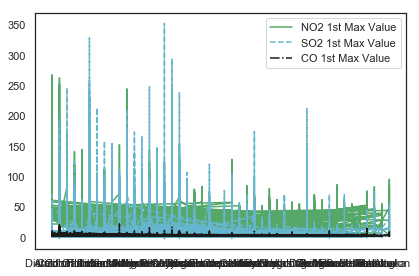

In [159]:
x =df['State']
y1 =df['NO2 1st Max Value']
y2 =df['SO2 1st Max Value']
y3 =df['CO 1st Max Value']
#y =df['NO2 1st Max Value']




plt.plot(x, y1 + 0, '-g')  # solid green
plt.plot(x, y2 + 1, '--c') # dashed cyan
plt.plot(x, y3+ 2, '-.k') # dashdot black
#plt.plot(x, x + 3, ':r');  # dotted red


plt.tight_layout()

plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

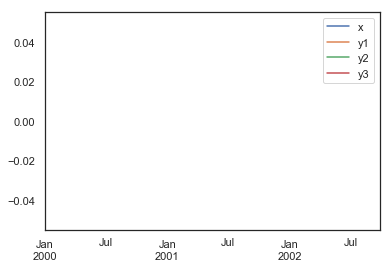

In [168]:
#ts = pd.Series(np.random.randn(1000),
               # index=pd.date_range('1/1/2000', periods=1000))
# Data
ts = pd.DataFrame({'x': df['State'], 'y1': df['NO2 1st Max Value'], 'y2': df['SO2 1st Max Value'], 'y3': df['CO 1st Max Value'] },
                 index=pd.date_range('1/1/2000', periods=1000, columns=list('ABCD'))

plt.figure()

ts = ts.cumsum()

ts.plot()


In [ ]:
 df = pd.DataFrame(np.random.randn(1000, 4),
                     index=ts.index, columns=list('ABCD'))
  

df = df.cumsum()

 plt.figure();

df.plot();

In [113]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [115]:
df.dtypes

State                        object
County                       object
City                         object
Date Local           datetime64[ns]
NO2 Mean                    float64
NO2 1st Max Value           float64
NO2 1st Max Hour              int64
NO2 AQI                       int64
O3 Mean                     float64
O3 1st Max Value            float64
O3 1st Max Hour               int64
O3 AQI                        int64
SO2 Mean                    float64
SO2 1st Max Value           float64
SO2 1st Max Hour              int64
SO2 AQI                     float64
CO Mean                     float64
CO 1st Max Value            float64
CO 1st Max Hour               int64
CO AQI                      float64
year                          int64
dtype: object

In [ ]:
df['State'] = df['State'].astype('str') 

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1737155 entries, 0 to 1746660
Data columns (total 21 columns):
State                object
County               object
City                 object
Date Local           datetime64[ns]
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour     int64
NO2 AQI              int64
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour      int64
O3 AQI               int64
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour     int64
SO2 AQI              float64
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour      int64
CO AQI               float64
year                 int64
dtypes: datetime64[ns](1), float64(10), int64(7), object(3)
memory usage: 291.6+ MB


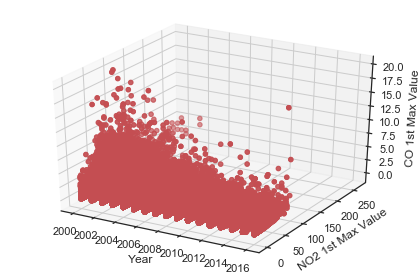

In [138]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =df['year']
y =df['NO2 1st Max Value']
z =df['CO 1st Max Value']



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('NO2 1st Max Value')
ax.set_zlabel('CO 1st Max Value')

plt.tight_layout()
plt.show()


In [139]:

ax = plt.axes(projection=’3d’)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap=’viridis’,edgecolor=’none’)

x =df['year']
y =df['NO2 1st Max Value']
z =df['CO 1st Max Value']



ax.set_xlabel('Year')
ax.set_ylabel('NO2 1st Max Value')
ax.set_zlabel('CO 1st Max Value')

plt.tight_layout()
plt.show()





SyntaxError: invalid character in identifier (<ipython-input-139-566e25cc66a8>, line 2)

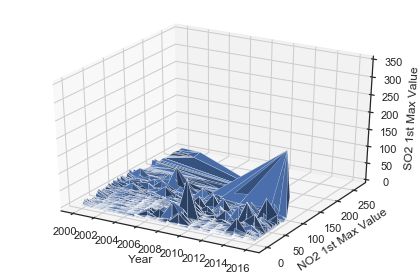

In [146]:
n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = df['year']
y = df['NO2 1st Max Value']

# Compute z to make the pringle surface.
z = df['SO2 1st Max Value']

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True, color='b')

ax.set_xlabel('Year')
ax.set_ylabel('NO2 1st Max Value')
ax.set_zlabel('SO2 1st Max Value')

plt.tight_layout()

plt.show()

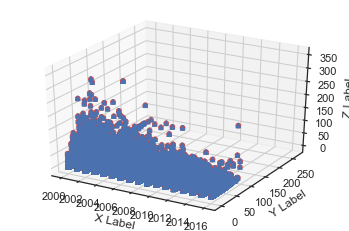

In [147]:
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = df['year']
    ys = df['NO2 1st Max Value']
    zs = df['SO2 1st Max Value']
    ax.scatter(xs, ys, zs, c=c, marker=m)



ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

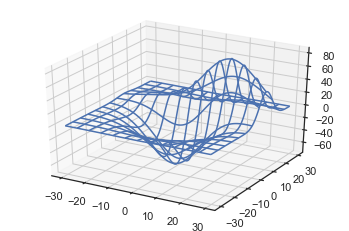

In [149]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = df['year']
Y = df['NO2 1st Max Value']

# Compute z to make the pringle surface.
Z = df['SO2 1st Max Value']


# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [171]:
df.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN,2000
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0,2000
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN,2000
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,...,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0,2000
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,...,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN,2000


In [ ]:
# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("data/PyberRideSharingData.png", bbox_inches="tight")




In [ ]:
state_CO_data = CO_data.groupby(['State']).mean()

In [30]:
state_CO_data.sort_values('CO AQI', ascending=False)

,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year
State,,,,,
Country Of Mexico,0.856178,1.561309,9.407050,17.698699,2007.623584
District Of Columbia,0.791535,1.018286,7.908412,11.602395,2008.052869
Arizona,0.492256,0.805822,7.067376,9.190681,2007.697521
Colorado,0.445569,0.673503,7.862629,7.724804,2009.410862
Missouri,0.469007,0.647200,7.433192,7.413180,2004.677178
California,0.449641,0.651882,6.514624,7.405755,2007.483773
Kansas,0.410451,0.575010,7.437047,6.541608,2006.123364
Alaska,0.424387,0.581781,7.052632,6.528340,2014.637652
Michigan,0.350807,0.563019,7.189057,6.469956,2003.424035
